# **Distance Predictor Part 1**
Author: Declan Costello

Date: 7/25/2023

## **Overview**

I plan to predict how far a batted ball is hit based on the 2022 MLB Season. I hope to provide value to the baseball community by combining my interests of the effects of altitude and hitting.

## **Part 1 Description**

Here I talk inspect and explore the data from the 2022 season of BBIP

## **Table of Context**

1. [Variables](#Variables)
2. [Installation](#Installation)
3. [Pulling Data](#Pulling-Data)
4. [Inspecting Data](#Inspecting-Data)
5. [Exploring Data](#Exploring-Data)
6. [Future Data Exploration](#Future-Data-Exploration)


## **Variables**
Descriptions taken Pybaseball and statcast. The following is a list of the important variable to understand for this notebook.

*   **Launch Angle** - In baseball, launch angle is the vertical angle at which the ball leaves the player's bat after being struck. It's measured in relation to the ground. A high launch angle means the ball will go further and higher into the air, and a low launch angle means the ball will go lower and not as far. 

*   **Altitude** - Altitude is a distance measurement, usually in the vertical or "up" direction, between a reference datum and sea level.

# **Installation**

The following installs the necessary packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pybaseball import statcast


# **Pulling Data**

We only want data from the 2022 season

In [2]:
#data = statcast(start_dt='2022-03-29', end_dt='2022-10-28')

Saving data for no more pulls

In [3]:
#data.to_csv('pybaseball_2022.csv')

In [4]:
data = pd.read_csv('pybaseball_2022.csv')

# **Inspecting Data**

Looking out for the quality of the data

In [5]:
data.shape

(741171, 93)

In [6]:
data.head()

Unnamed: 0 pitch_type   game_date  release_speed  release_pos_x  \
0         129         SL  2022-10-28           82.9          -2.70   
1         136         SL  2022-10-28           83.4          -2.72   
2         139         SL  2022-10-28           80.8          -2.57   
3         145         KC  2022-10-28           82.2          -2.50   
4         147         KC  2022-10-28           84.0          -2.58   

   release_pos_z       player_name  batter  pitcher     events  ... fld_score  \
0           5.66  Robertson, David  649557   502085  field_out  ...         6   
1           5.73  Robertson, David  649557   502085        NaN  ...         6   
2           5.82  Robertson, David  649557   502085        NaN  ...         6   
3           5.91  Robertson, David  649557   502085        NaN  ...         6   
4           5.84  Robertson, David  649557   502085        NaN  ...         6   

   post_away_score  post_home_score  post_bat_score  post_fld_score  \
0                6                5               5               6   
1                6                5               5               6   
2                6                5               5               6   
3                6                5               5               6   
4                6                5               5               6   

   if_fielding_alignment of_fielding_alignment spin_axis delta_home_win_exp  \
0               Standard              Standard      84.0             -0.235   
1               Standard              Standard      90.0              0.000   
2               Standard              Standard      65.0              0.000   
3               Standard              Standard      39.0              0.000   
4               Standard              Standard      33.0              0.066   

  delta_run_exp  
0        -0.568  
1        -0.102  
2         0.037  
3         0.049  
4         0.054  

[5 rows x 93 columns]

In [7]:
data.describe()

Unnamed: 0  release_speed  release_pos_x  release_pos_z  \
count  741171.000000  731547.000000  731562.000000  731562.000000   
mean     2026.154994      88.909665      -0.811685       5.804788   
std      1263.986480       6.150794       1.835406       0.564332   
min         0.000000      32.300000      -4.950000       0.860000   
25%       940.000000      84.600000      -2.090000       5.530000   
50%      1933.000000      89.800000      -1.510000       5.850000   
75%      3040.000000      93.800000       0.910000       6.150000   
max      5265.000000     104.200000       4.750000       7.740000   

              batter        pitcher  spin_dir  spin_rate_deprecated  \
count  741171.000000  741171.000000       0.0                   0.0   
mean   615049.081923  613798.197749       NaN                   NaN   
std     59629.052082   61250.075346       NaN                   NaN   
min    405395.000000  405395.000000       NaN                   NaN   
25%    592206.000000  592791.000000       NaN                   NaN   
50%    640461.000000  624133.000000       NaN                   NaN   
75%    664034.000000  663559.000000       NaN                   NaN   
max    703715.000000  801389.000000       NaN                   NaN   

       break_angle_deprecated  break_length_deprecated  ...     away_score  \
count                     0.0                      0.0  ...  741171.000000   
mean                      NaN                      NaN  ...       2.213308   
std                       NaN                      NaN  ...       2.587177   
min                       NaN                      NaN  ...       0.000000   
25%                       NaN                      NaN  ...       0.000000   
50%                       NaN                      NaN  ...       1.000000   
75%                       NaN                      NaN  ...       3.000000   
max                       NaN                      NaN  ...      29.000000   

           bat_score      fld_score  post_away_score  post_home_score  \
count  741171.000000  741171.000000    741171.000000    741171.000000   
mean        2.122122       2.164348         2.228182         2.088263   
std         2.484834       2.576240         2.593737         2.478732   
min         0.000000       0.000000         0.000000         0.000000   
25%         0.000000       0.000000         0.000000         0.000000   
50%         1.000000       1.000000         1.000000         1.000000   
75%         3.000000       3.000000         3.000000         3.000000   
max        29.000000      29.000000        29.000000        21.000000   

       post_bat_score  post_fld_score      spin_axis  delta_home_win_exp  \
count   741171.000000   741171.000000  729590.000000       741171.000000   
mean         2.152097        2.164348     175.301669            0.000128   
std          2.498857        2.576240      72.285741            0.028306   
min          0.000000        0.000000       0.000000           -0.736000   
25%          0.000000        0.000000     131.000000            0.000000   
50%          1.000000        1.000000     199.000000            0.000000   
75%          3.000000        3.000000     222.000000            0.000000   
max         29.000000       29.000000     360.000000            0.910000   

       delta_run_exp  
count  718843.000000  
mean        0.000023  
std         0.237105  
min        -1.473000  
25%        -0.066000  
50%        -0.017000  
75%         0.033000  
max         3.605000  

[8 rows x 76 columns]

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 741171 entries, 0 to 741170
Data columns (total 93 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   Unnamed: 0                       741171 non-null  int64  
 1   pitch_type                       731602 non-null  object 
 2   game_date                        741171 non-null  object 
 3   release_speed                    731547 non-null  float64
 4   release_pos_x                    731562 non-null  float64
 5   release_pos_z                    731562 non-null  float64
 6   player_name                      741171 non-null  object 
 7   batter                           741171 non-null  int64  
 8   pitcher                          741171 non-null  int64  
 9   events                           192992 non-null  object 
 10  description                      741171 non-null  object 
 11  spin_dir                         0 non-null       float64
 12  sp

In [9]:
data.nunique().sort_values(ascending=False)

vy0                        731562
az                         731562
ay                         731562
ax                         731562
vz0                        731562
                            ...  
umpire                          0
sv_id                           0
break_angle_deprecated          0
spin_rate_deprecated            0
break_length_deprecated         0
Length: 93, dtype: int64

In [10]:
for i in data.columns:
    print(i)

Unnamed: 0
pitch_type
game_date
release_speed
release_pos_x
release_pos_z
player_name
batter
pitcher
events
description
spin_dir
spin_rate_deprecated
break_angle_deprecated
break_length_deprecated
zone
des
game_type
stand
p_throws
home_team
away_team
type
hit_location
bb_type
balls
strikes
game_year
pfx_x
pfx_z
plate_x
plate_z
on_3b
on_2b
on_1b
outs_when_up
inning
inning_topbot
hc_x
hc_y
tfs_deprecated
tfs_zulu_deprecated
fielder_2
umpire
sv_id
vx0
vy0
vz0
ax
ay
az
sz_top
sz_bot
hit_distance_sc
launch_speed
launch_angle
effective_speed
release_spin_rate
release_extension
game_pk
pitcher.1
fielder_2.1
fielder_3
fielder_4
fielder_5
fielder_6
fielder_7
fielder_8
fielder_9
release_pos_y
estimated_ba_using_speedangle
estimated_woba_using_speedangle
woba_value
woba_denom
babip_value
iso_value
launch_speed_angle
at_bat_number
pitch_number
pitch_name
home_score
away_score
bat_score
fld_score
post_away_score
post_home_score
post_bat_score
post_fld_score
if_fielding_alignment
of_fielding_alignme

# **Exploring Data**

Exploring out the Distributions of the relevant columns

What features determine the result of a hit?

 **Heat Map**

In [11]:
possible_features = data

possible_features = possible_features[[ 'release_speed',
       'release_pos_x', 'release_pos_z', 
       'hit_location', 'pfx_x',
       'pfx_z', 'plate_x', 'plate_z', 'on_3b', 'on_2b', 'on_1b',
       'outs_when_up',  'hc_x', 'hc_y',
       'vx0', 'vy0', 'vz0', 'ax', 'ay', 'az', 'sz_top', 'sz_bot',
       'hit_distance_sc', 'launch_speed', 'launch_angle', 'effective_speed',
       'release_spin_rate', 'release_extension', 'game_pk', 'release_pos_y',
       'estimated_ba_using_speedangle', 'estimated_woba_using_speedangle',
       'woba_value', 'woba_denom', 'babip_value', 'iso_value',
       'launch_speed_angle', 'at_bat_number', 'pitch_number', 
       'home_score', 'away_score', 'bat_score', 'fld_score', 
        'spin_axis','delta_home_win_exp']]

plt.figure(figsize=(45, 45))
sns.set_theme(style="white")

sns.heatmap(possible_features.corr().abs(), annot=False, cmap="YlGnBu")

# fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() 
b += 0.5 
t -= 0.5 
plt.ylim(b, t) 
plt.show()

 **Distribution Plots**

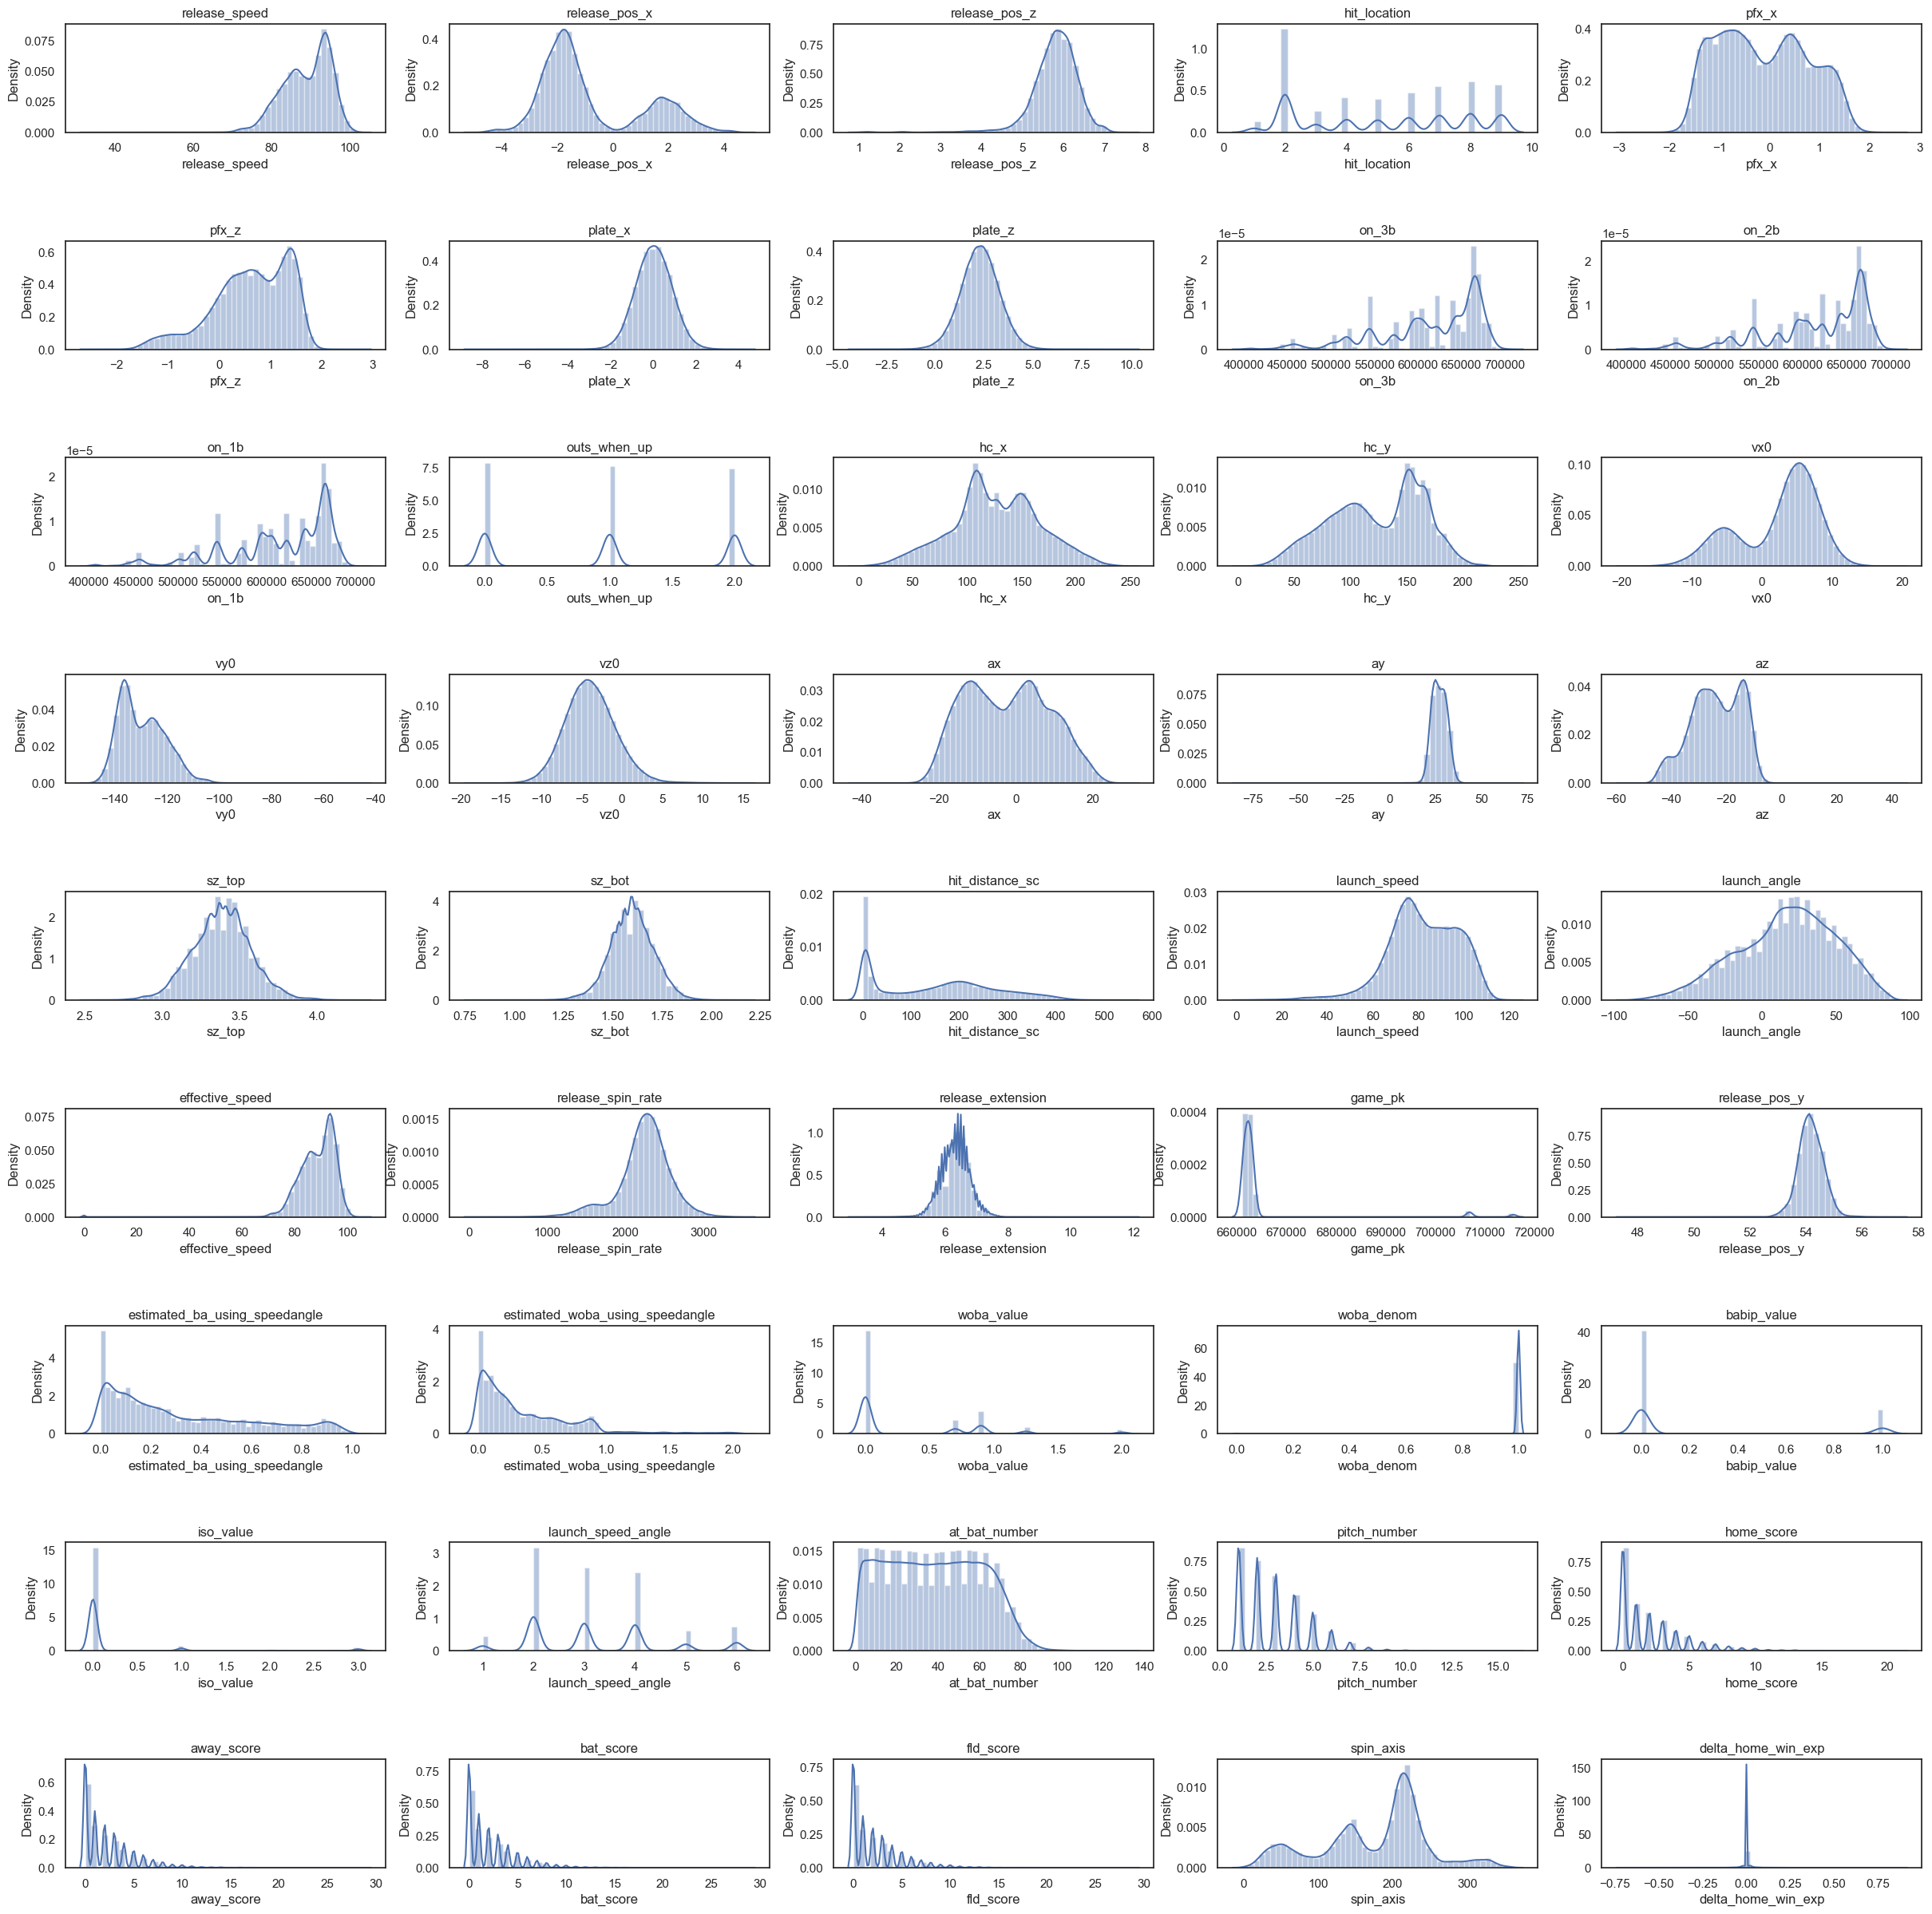

In [12]:
#only turning off for graph
import warnings
warnings.filterwarnings("ignore")

f, ax = plt.subplots(nrows = 9, ncols = 5, figsize=(30,30))
sns.set_theme(style="white")

# Selecting columns we want distributions for 
hist_cols = [ 'release_speed',
       'release_pos_x', 'release_pos_z', 
       'hit_location', 'pfx_x',
       'pfx_z', 'plate_x', 'plate_z', 'on_3b', 'on_2b', 'on_1b',
       'outs_when_up',  'hc_x', 'hc_y',
       'vx0', 'vy0', 'vz0', 'ax', 'ay', 'az', 'sz_top', 'sz_bot',
       'hit_distance_sc', 'launch_speed', 'launch_angle', 'effective_speed',
       'release_spin_rate', 'release_extension', 'game_pk', 'release_pos_y',
       'estimated_ba_using_speedangle', 'estimated_woba_using_speedangle',
       'woba_value', 'woba_denom', 'babip_value', 'iso_value',
       'launch_speed_angle', 'at_bat_number', 'pitch_number', 
       'home_score', 'away_score', 'bat_score', 'fld_score', 
        'spin_axis','delta_home_win_exp']
row = 0
col = 0

for i, column in enumerate(hist_cols):
    graph = sns.distplot(possible_features[column], ax=ax[row][col])
    graph.set(title = column)
    col += 1
    if col == 5:
        col = 0
        row += 1
        
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=1)

 **Scatter Plots**

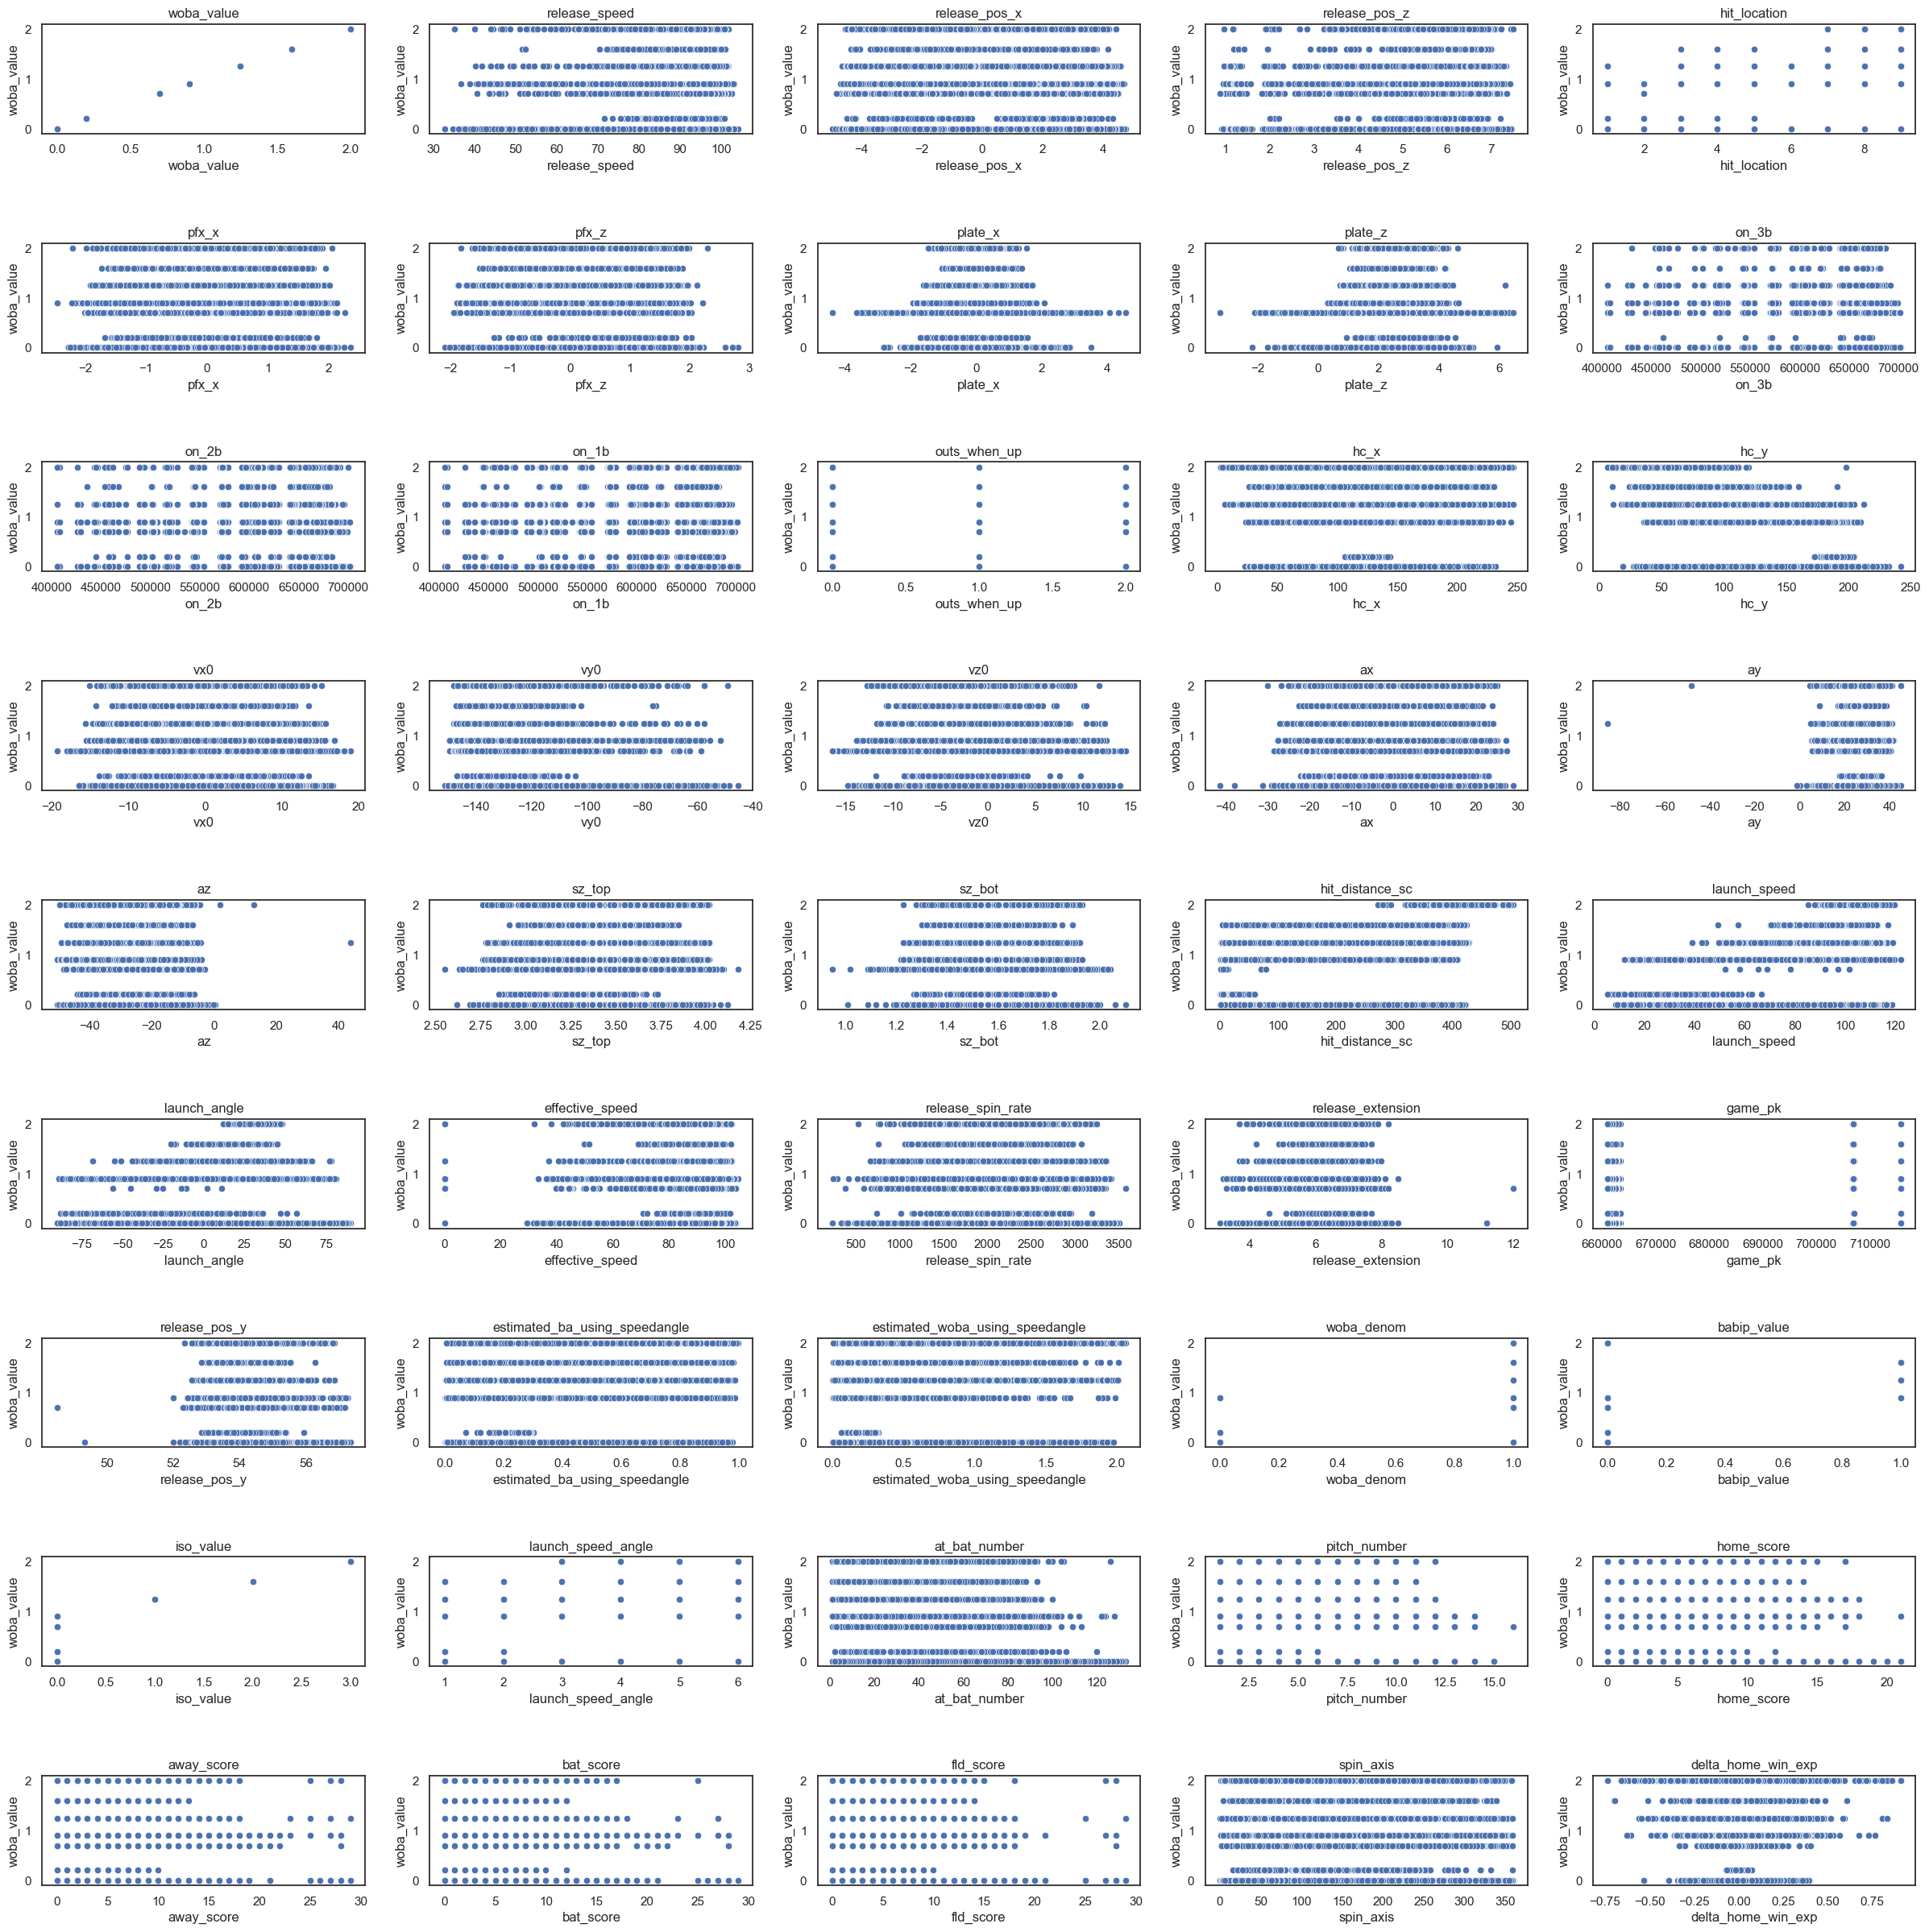

In [13]:
f, ax = plt.subplots(nrows = 9, ncols = 5, figsize=(30,30))
sns.set_theme(style="white")

dist_cols = [ 'woba_value','release_speed',
       'release_pos_x', 'release_pos_z', 
       'hit_location', 'pfx_x',
       'pfx_z', 'plate_x', 'plate_z', 'on_3b', 'on_2b', 'on_1b',
       'outs_when_up',  'hc_x', 'hc_y',
       'vx0', 'vy0', 'vz0', 'ax', 'ay', 'az', 'sz_top', 'sz_bot',
       'hit_distance_sc', 'launch_speed', 'launch_angle', 'effective_speed',
       'release_spin_rate', 'release_extension', 'game_pk', 'release_pos_y',
       'estimated_ba_using_speedangle', 'estimated_woba_using_speedangle',
        'woba_denom', 'babip_value', 'iso_value',
       'launch_speed_angle', 'at_bat_number', 'pitch_number', 
       'home_score', 'away_score', 'bat_score', 'fld_score', 
        'spin_axis','delta_home_win_exp']
row = 0
col = 0
for i, column in enumerate(dist_cols):
    graph = sns.scatterplot(x=column, y="woba_value", data=possible_features, ax=ax[row][col]);
    graph.set(title = column)
    col += 1
    if col == 5:
        col = 0
        row += 1
        
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=1)

 **Scatter Matrix**

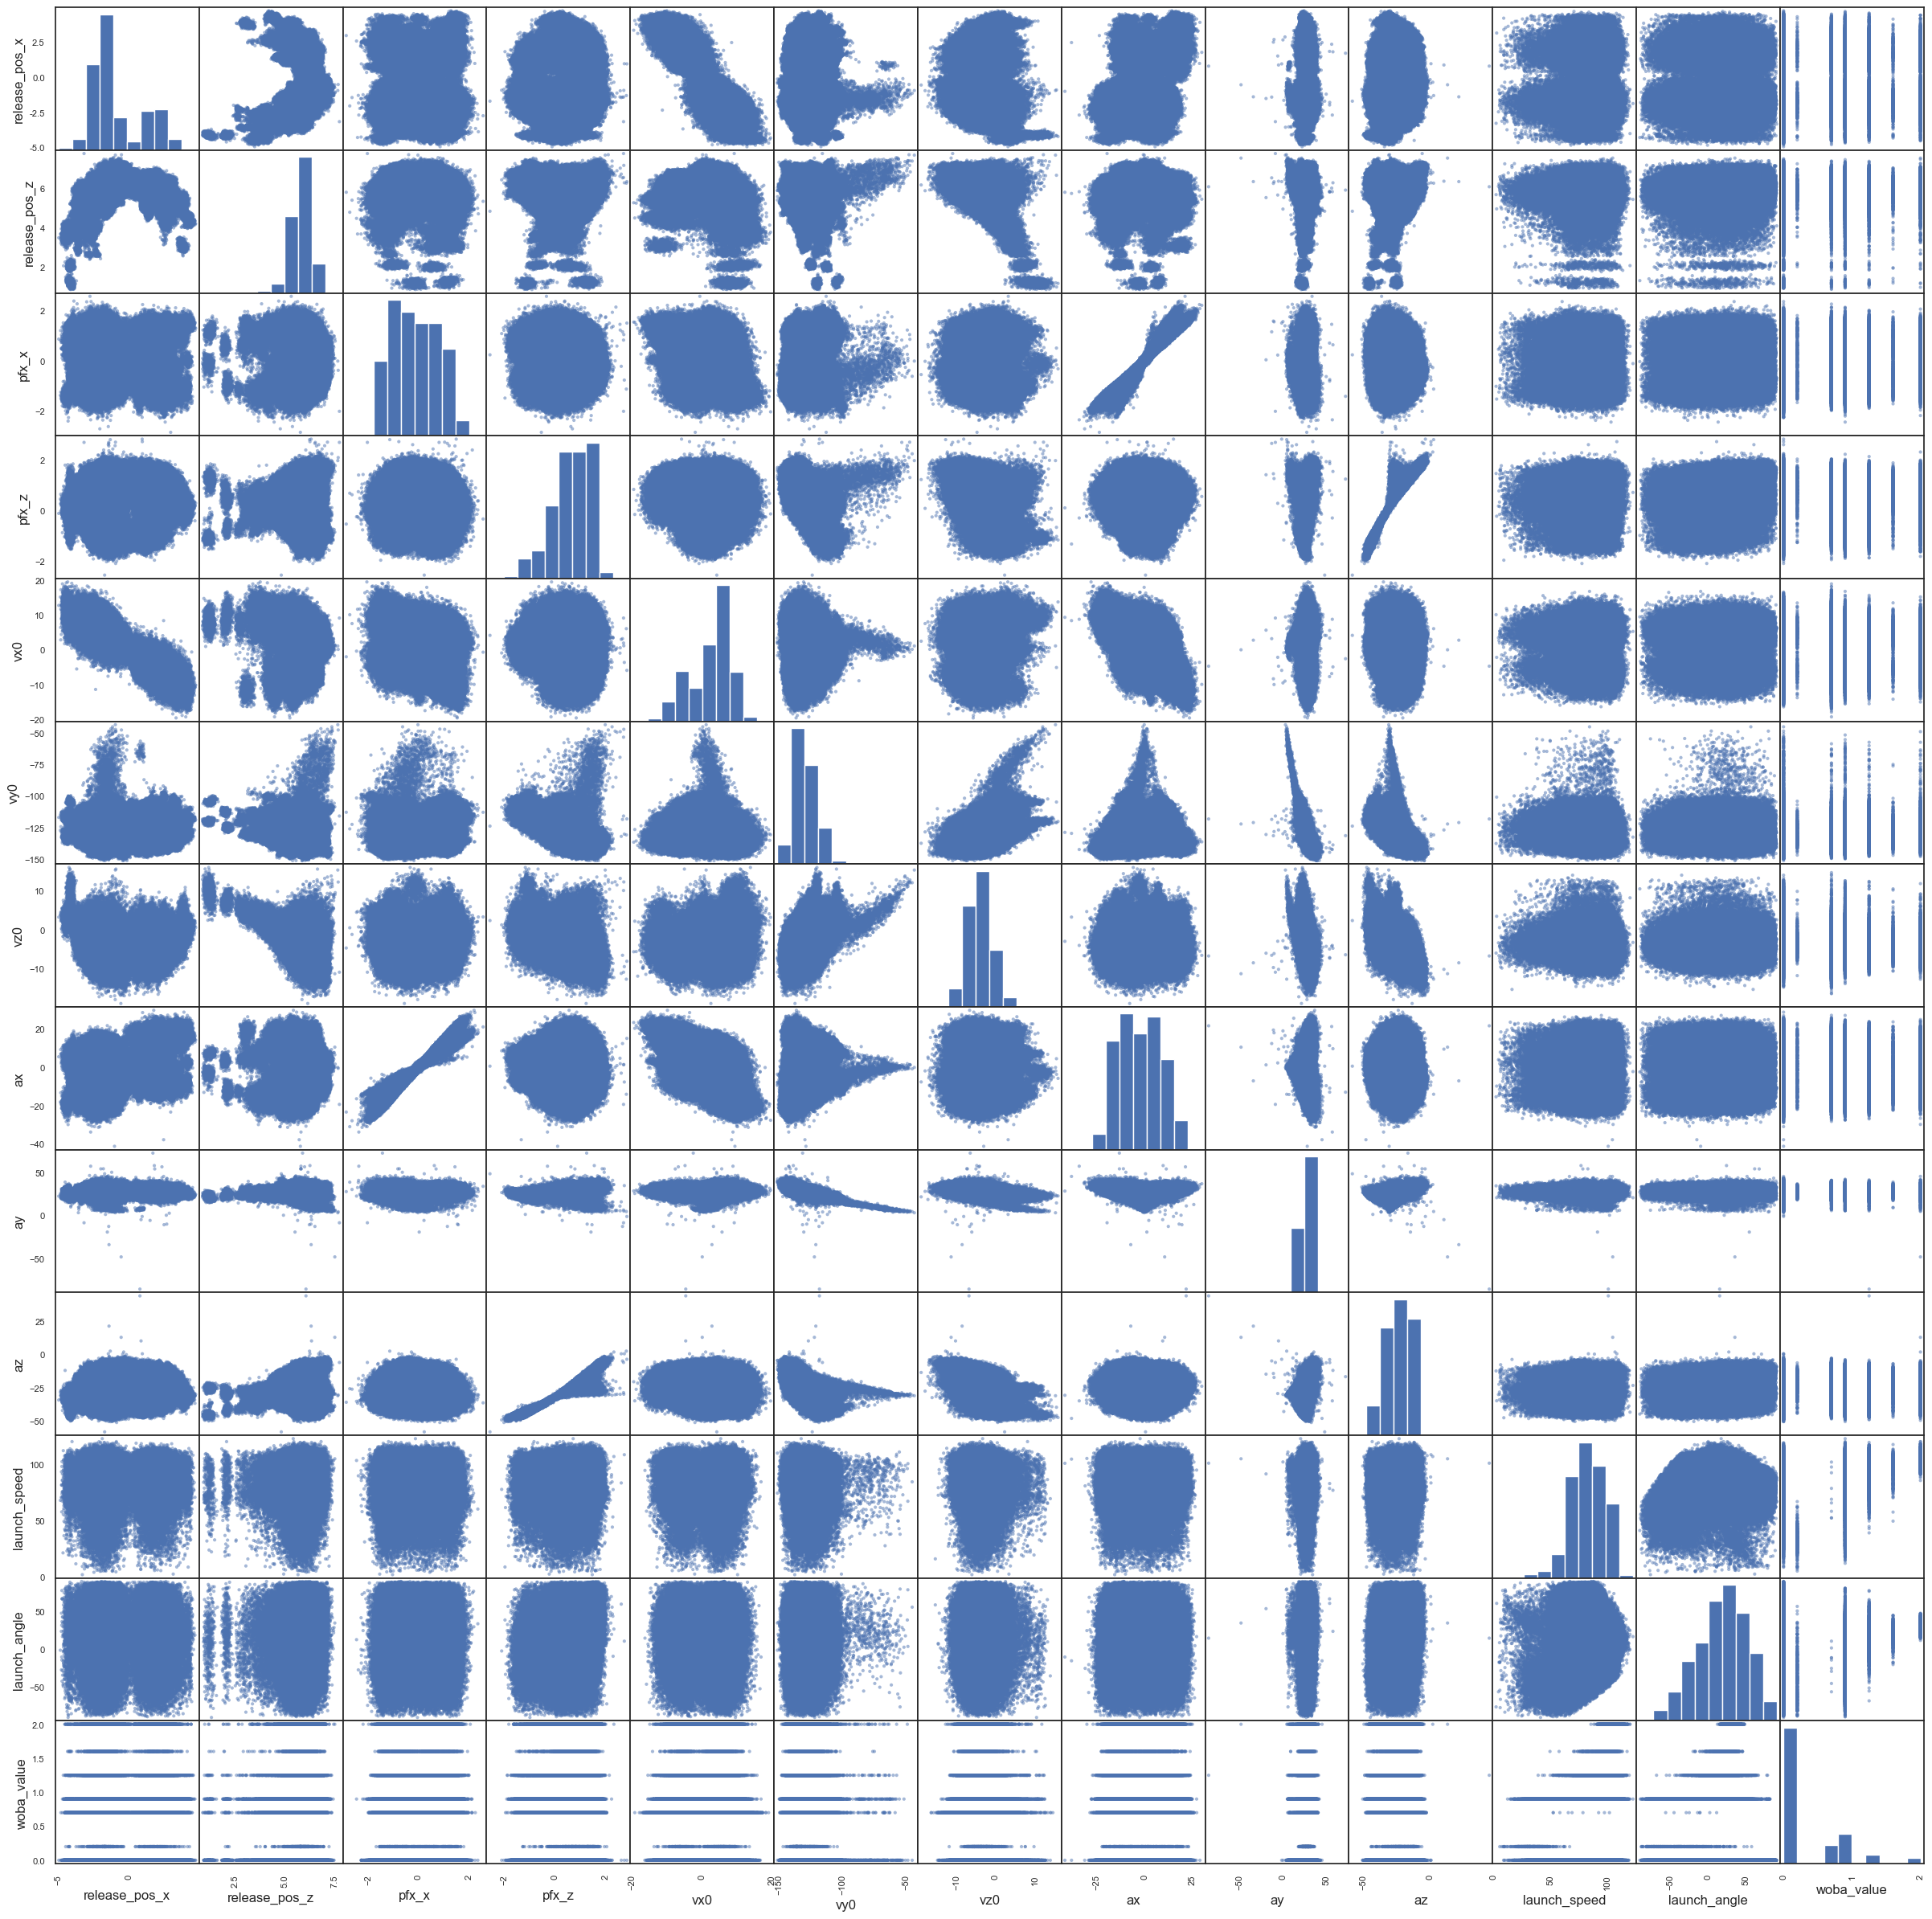

In [14]:
possible_features = possible_features[['release_pos_x', 'release_pos_z', #removed release_speed because it is the same as vy0
                                       'pfx_x','pfx_z', 'vx0', 'vy0', 'vz0', 'ax', 'ay', 'az', 
                                       'launch_speed', 'launch_angle','woba_value']]

pd.plotting.scatter_matrix(possible_features, figsize=(30, 30))
plt.show()

**Legend Set Up**

In [11]:
events_renamed = {
    'home_run':'Home Run',
    'triple':'Triple', 
    'field_out' :'Field Out',
    'single':'Single',
    'double':'Double'
}

data['Events'] = data['events'].map(events_renamed)

pal = {
    
    'Home Run':'red',
    'Triple':'red', 
    'Field Out':'#2288b6',
    'Single':'yellow',
    'Double':'orange'
}

 **Pair Grid**

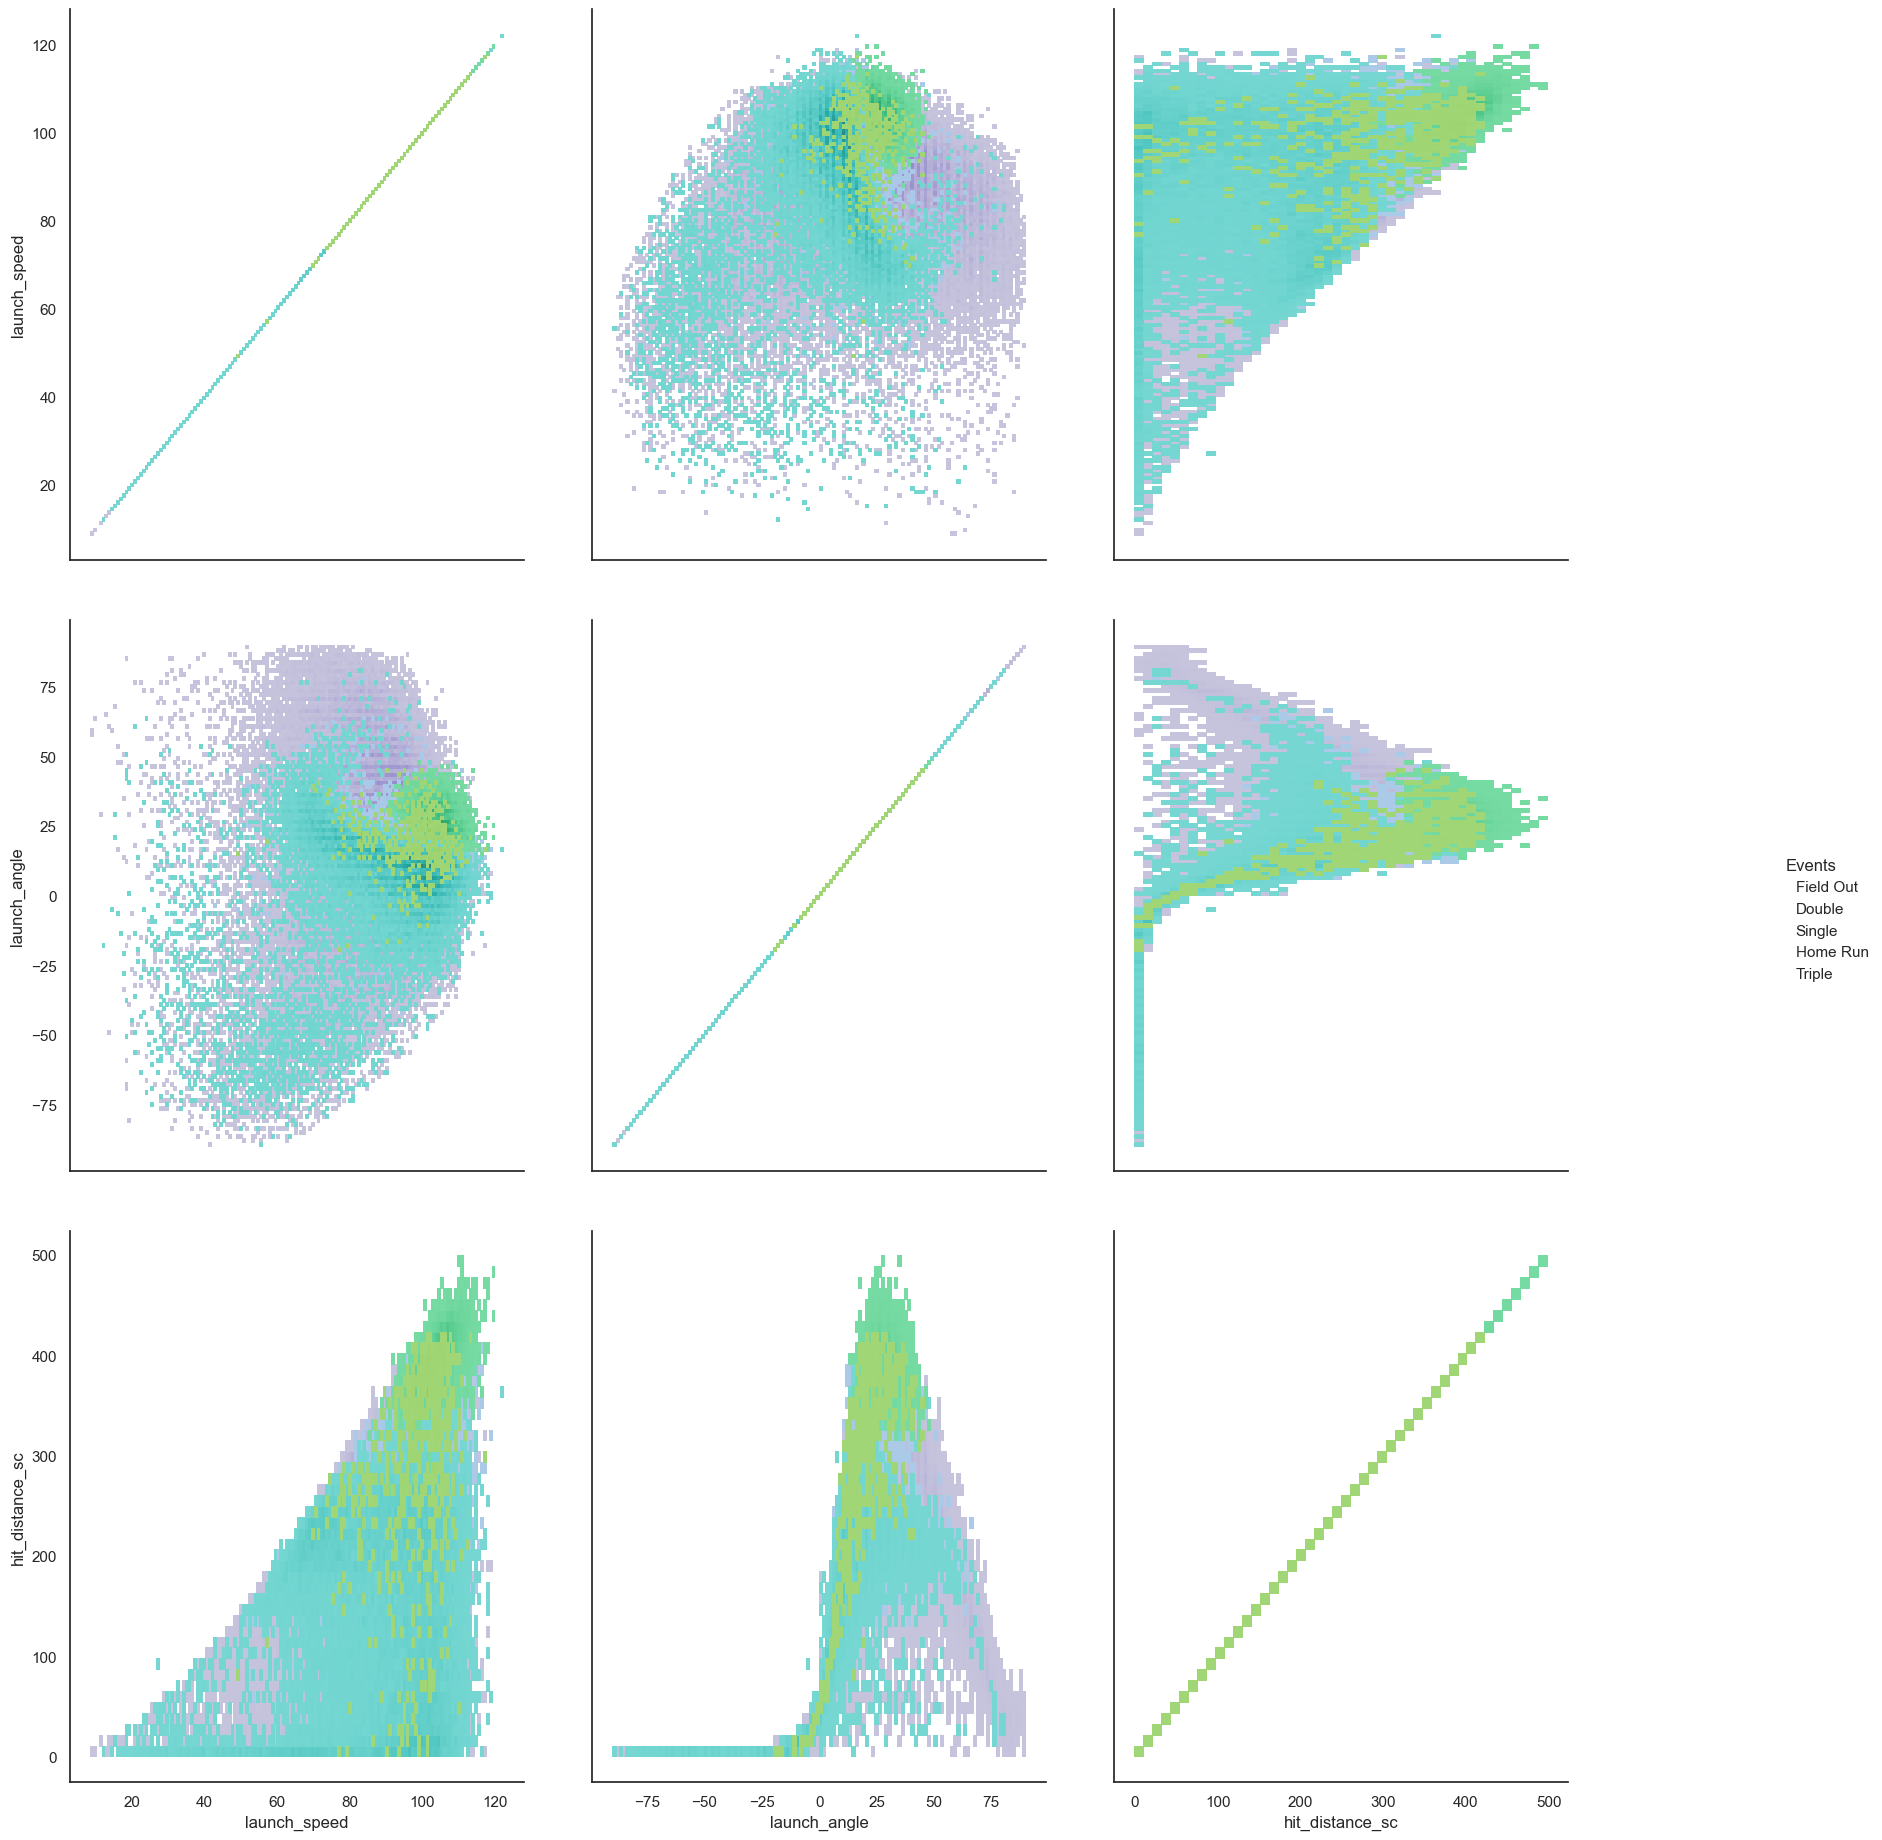

In [13]:
hitting_df = data[data['events'].isin(["field_out", "single", "double",  "triple", "home_run"])]

hitting_df = hitting_df[hitting_df['launch_speed'].notna()]
hitting_df = hitting_df[hitting_df['launch_angle'].notna()]
hitting_df = hitting_df[hitting_df['hc_x'].notna()]
hitting_df = hitting_df[hitting_df['hc_y'].notna()]
hitting_df = hitting_df[hitting_df['hit_distance_sc'].notna()]

g = sns.set_theme(style="white")
g = sns.PairGrid(hitting_df, vars=["launch_speed", "launch_angle","hit_distance_sc"], hue="Events", palette="viridis")
g.add_legend(title ="Events")
g.map(sns.histplot)
g.fig.set_size_inches(20,20)


 **Histograms**

EV is directly correlated with distance and higher woba

[Text(0.5, 0, "80th Percentile EV's Distance"), Text(0, 0.5, 'Count')]

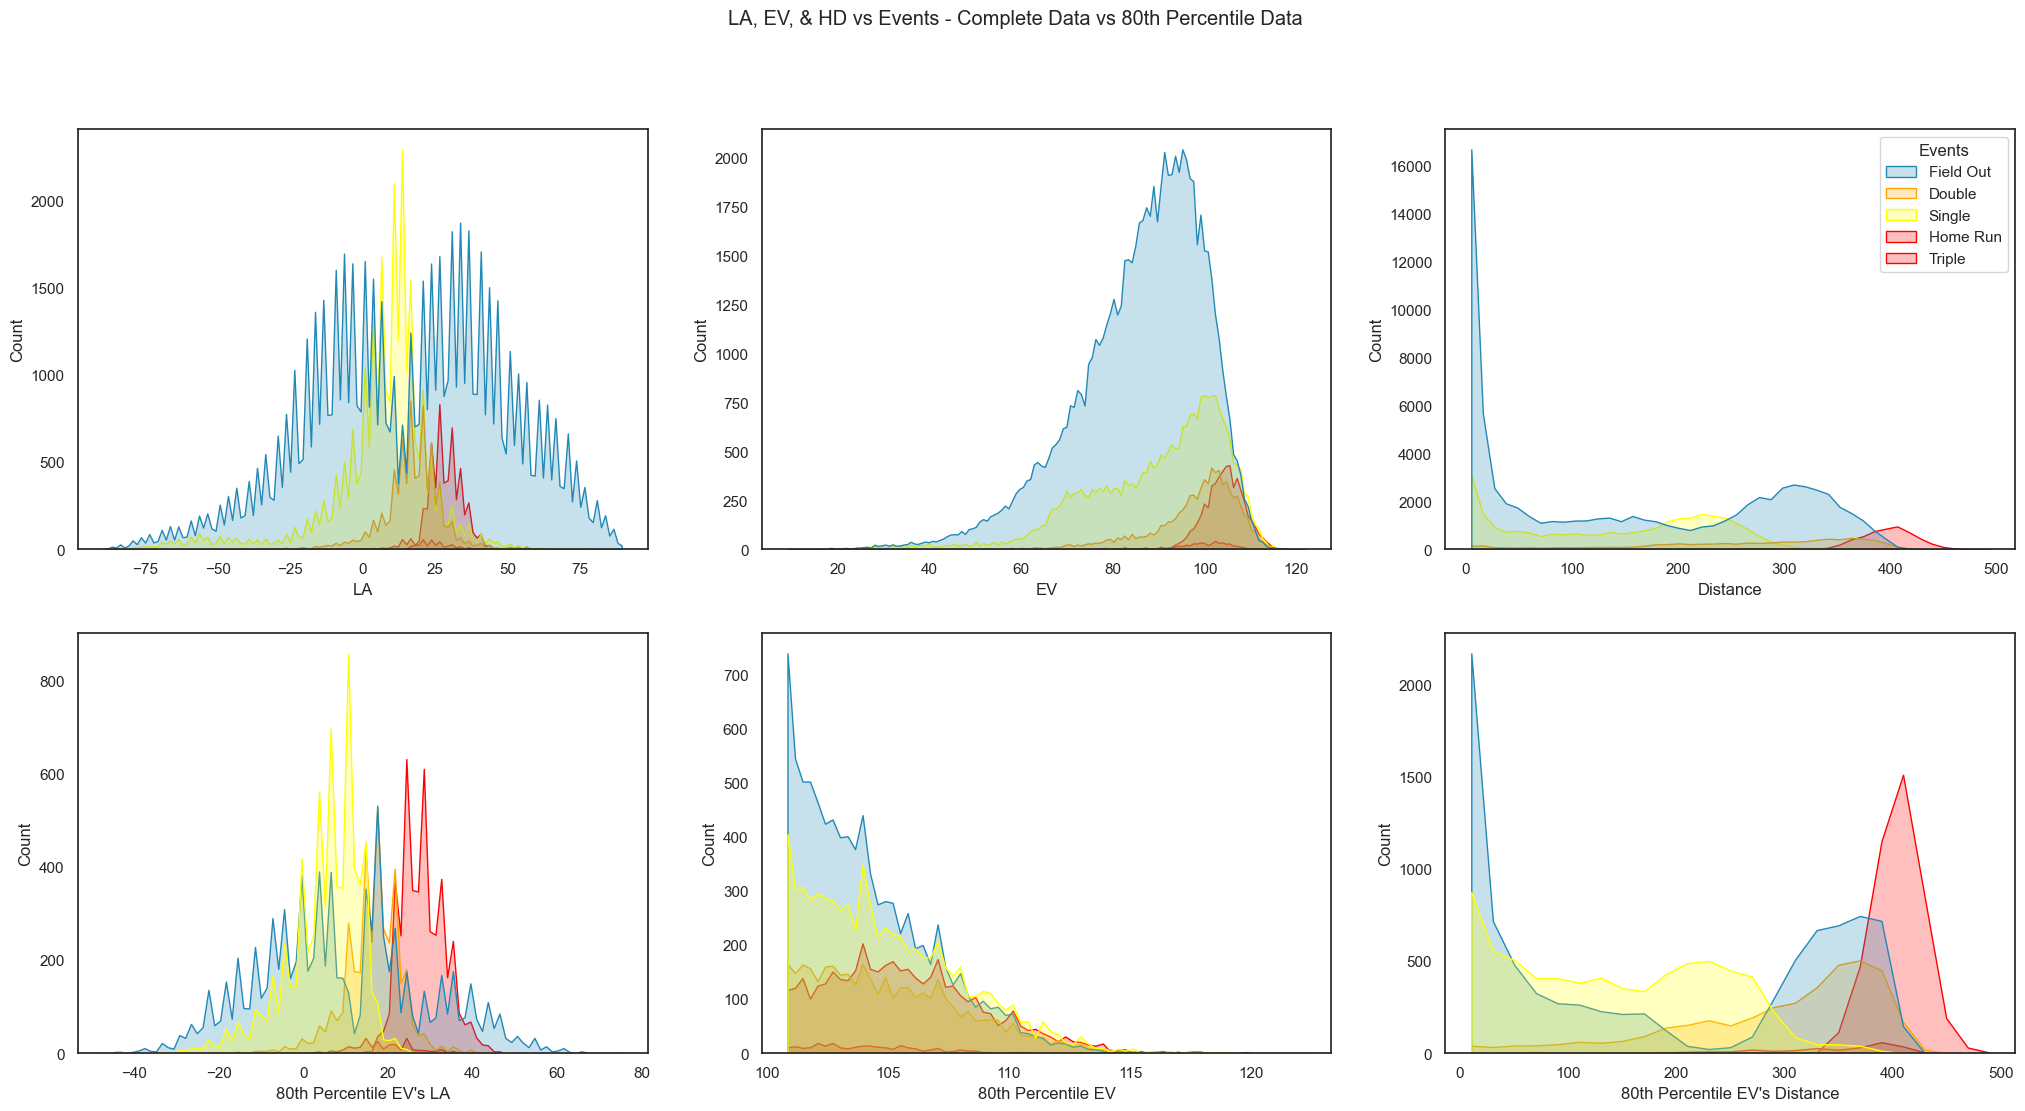

In [15]:
ev_80_percentile_df = hitting_df

ev_80_percentile_df['launch_speed_percentile'] = ev_80_percentile_df['launch_speed'].rank(pct=True)

ev_80_percentile_df = ev_80_percentile_df.loc[ev_80_percentile_df['launch_speed_percentile'] > .79]

ev_80_percentile_df = ev_80_percentile_df.rename(columns={'launch_speed': '80th_EV_launch_speed', 'launch_angle': '80th_EV_launch_angle', 'hit_distance_sc':'80th_EV_hit_distance_sc'})

fig, axes = plt.subplots(2, 3, figsize=(25, 12))

fig.suptitle('LA, EV, & HD vs Events - Complete Data vs 80th Percentile Data')
sns.set_theme(style="white")


ax = sns.histplot(ax=axes[0, 0], data=hitting_df,x="launch_angle", hue="Events", element="poly", legend=False,palette=pal)
ax.set(xlabel = 'LA',ylabel = 'Count')

ax = sns.histplot(ax=axes[0, 1], data=hitting_df,x="launch_speed", hue="Events",  legend=False,element="poly",palette=pal)
ax.set(xlabel = 'EV',ylabel = 'Count')

ax = sns.histplot(ax=axes[0, 2], data=hitting_df,x="hit_distance_sc", hue="Events", element="poly", legend=True,palette=pal)
ax.set(xlabel = 'Distance',ylabel = 'Count')


ax = sns.histplot(ax=axes[1, 0], data=ev_80_percentile_df,x="80th_EV_launch_angle", hue="Events", element="poly", legend=False,palette=pal)
ax.set(xlabel = "80th Percentile EV's LA",ylabel = 'Count')

ax = sns.histplot(ax=axes[1, 1], data=ev_80_percentile_df,x="80th_EV_launch_speed", hue="Events", element="poly", legend=False,palette=pal)
ax.set(xlabel = '80th Percentile EV',ylabel = 'Count')
ax = sns.histplot(ax=axes[1, 2], data=ev_80_percentile_df,x="80th_EV_hit_distance_sc", hue="Events", element="poly", legend=False,palette=pal)
ax.set(xlabel = "80th Percentile EV's Distance",ylabel = 'Count')



 **Scatter Plots**

In [18]:
plt.figure(figsize=(50,10))
sns.set_theme(style="white")


plt.subplot(141)
ax = sns.scatterplot(data = hitting_df, x=hitting_df.launch_speed, y=hitting_df.launch_angle, hue = hitting_df.Events, alpha = 0.02,legend=False,palette=pal)
ax.set(xlabel = 'EV',ylabel = 'LA')
plt.title('Distance vs EV & LA')

plt.subplot(142)
#cmap="PiYG")
ax = sns.scatterplot(data = ev_80_percentile_df, x=ev_80_percentile_df['80th_EV_launch_speed'], y=ev_80_percentile_df['80th_EV_launch_angle'], hue = ev_80_percentile_df.Events, alpha = 0.2,palette=pal)
ax.set(xlabel = 'EV',ylabel = 'LA')
plt.title('Distance vs EV & LA - 80th Percentile EV')

plt.show()

 **Heat Maps**

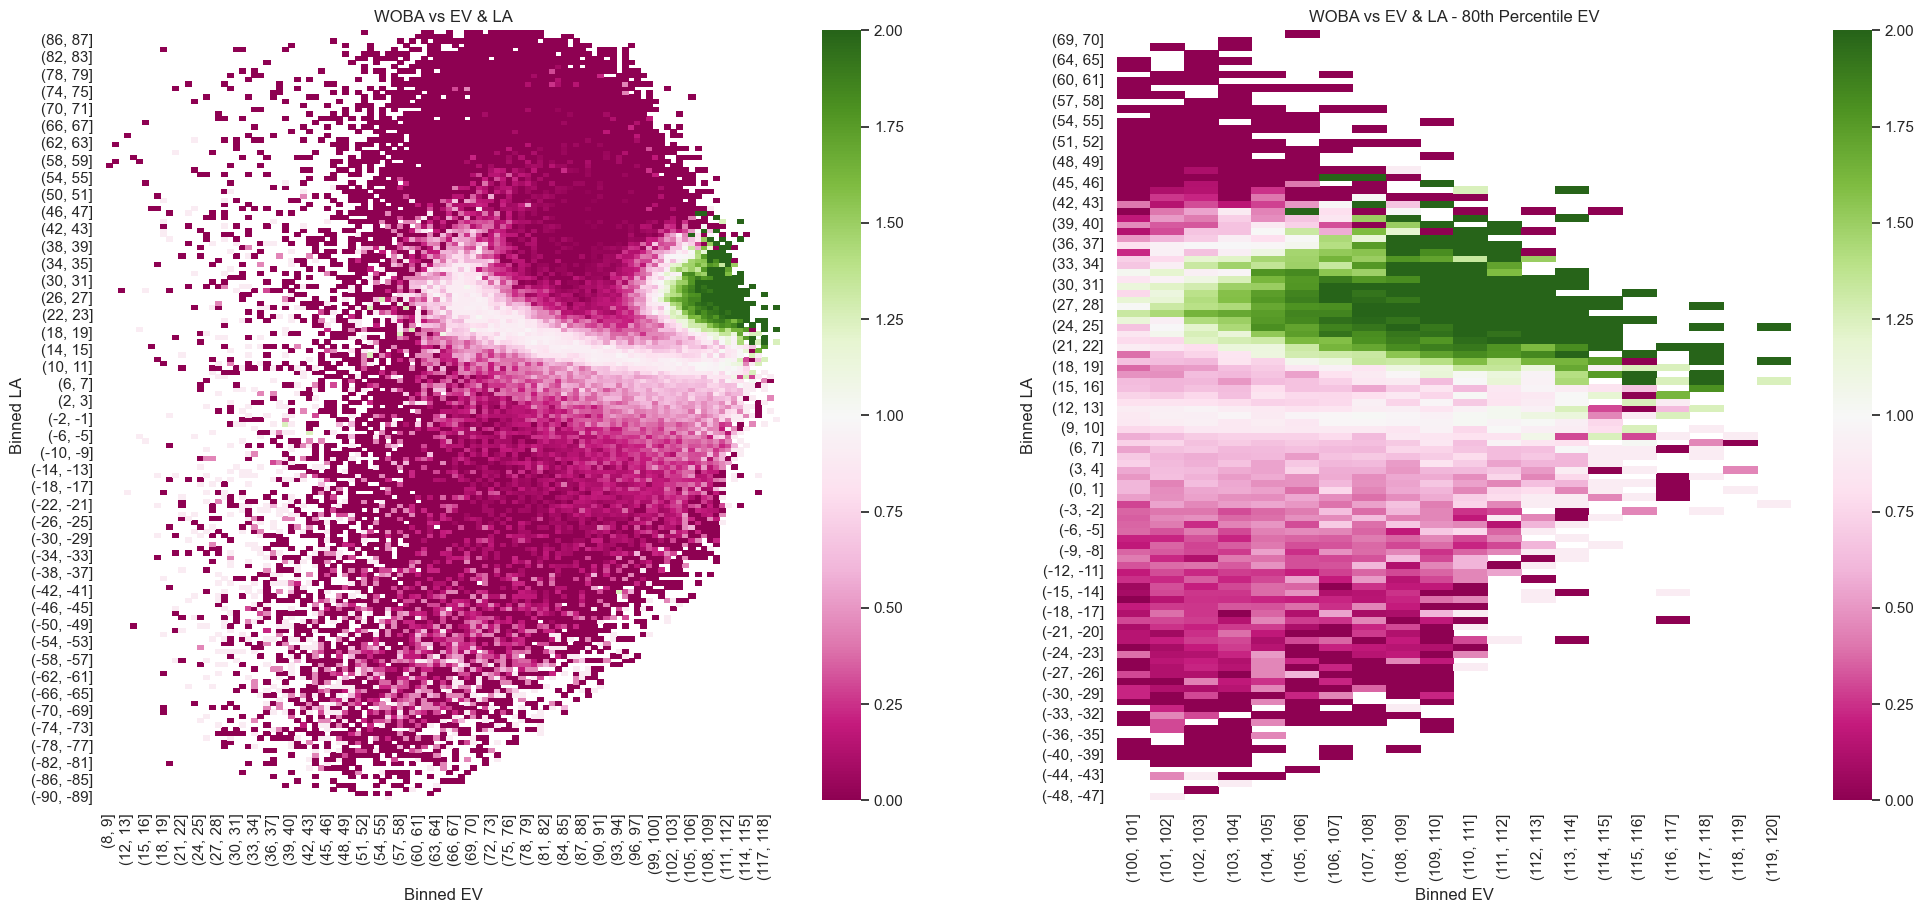

In [16]:
import warnings
#only turning off for graph
warnings.filterwarnings("ignore")


hitting_df_binned = hitting_df

bins = []
for i in range(int(hitting_df["launch_angle"].min()), int(hitting_df["launch_angle"].max()), 1):
    bins.append(i)

hitting_df_binned['launch_angle_binned'] = pd.cut(hitting_df_binned['launch_angle'], bins)

bins = []
for i in range(int(hitting_df["launch_speed"].min()), int(hitting_df["launch_speed"].max()), 1):
    bins.append(i)

hitting_df_binned['launch_speed_binned'] = pd.cut(hitting_df_binned['launch_speed'], bins)

non_coors_new_rel_terms = hitting_df_binned.pivot_table(index='launch_angle_binned', columns='launch_speed_binned', values='woba_value', aggfunc='mean')


#------80TH PERCENTILE DATA BINNING-------------


hitting_df_binned_80 = ev_80_percentile_df

bins = []
for i in range(int(hitting_df_binned_80["80th_EV_launch_angle"].min()), int(hitting_df_binned_80["80th_EV_launch_angle"].max()), 1):
    bins.append(i)

hitting_df_binned_80['80th_EV_launch_angle_binned'] = pd.cut(hitting_df_binned_80['80th_EV_launch_angle'], bins)

bins = []
for i in range(int(hitting_df_binned_80["80th_EV_launch_speed"].min()), int(hitting_df_binned_80["80th_EV_launch_speed"].max()), 1):
    bins.append(i)

hitting_df_binned_80['80th_EV_launch_speed_binned'] = pd.cut(hitting_df_binned_80['80th_EV_launch_speed'], bins)

non_coors_new_rel_terms_80 = hitting_df_binned_80.pivot_table(index='80th_EV_launch_angle_binned', columns='80th_EV_launch_speed_binned', values='woba_value', aggfunc='mean')


#---------PLOTTING FIGS--------------


plt.figure(figsize=(50,10))
sns.set_theme(style="white")  

plt.subplot(141)
ax = sns.heatmap(non_coors_new_rel_terms,cmap="PiYG")
ax.invert_yaxis()
ax.set(xlabel = 'Binned EV',ylabel = 'Binned LA')
plt.title('WOBA vs EV & LA')

plt.subplot(142)
ax = sns.heatmap(non_coors_new_rel_terms_80, cmap="PiYG")
ax.invert_yaxis()
ax.set(xlabel = 'Binned EV',ylabel = 'Binned LA')
plt.title('WOBA vs EV & LA - 80th Percentile EV')

plt.show()

In [20]:
plt.figure(figsize=(10,10))
sns.set_theme(style="white")

ax = sns.scatterplot(data = hitting_df, x=hitting_df.hc_x, y=hitting_df.hc_y,  hue = hitting_df.Events, alpha = 0.3, 
palette=pal)
ax.invert_yaxis()

plt.legend(title = "Events",loc = 'upper right')
plt.title('Event vs (X,Y)')
plt.show()

# **Future Data Exploration**

In the future, I plan to recreate [Dynamic Hard Hit Rate](https://blogs.fangraphs.com/now-lets-tweak-hard-hit-rate-using-spray-angle/) visuals for the 2022 MLB Season